<h1> Angle Information </h1> 

Well there was a mistake in my user event in "stage3_simple_network_coral_corr". Let's redo this using classes.

In [1]:
# own skrips
import myfunctions as mf
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit

In [2]:
rootfile = uproot.open('./stage3_clusters_momentuminfo_corr.root')
ipd = hf.InputData(rootfile)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (5, 5)  grid...
Shaping the clusters took  153.12508964538574 s
Splitted data into training and test set!
Prepared 'training' data
Prepared 'veri_truth' data
Prepared 'veri_fit' data


In [3]:
num_fit = ipd.num_fit
ind_bad0 = np.where(num_fit == 0)
ind_bad1 = np.where(num_fit == 1)
ind_bad2 = np.where(num_fit == 2)
ind_bad3 = np.where(num_fit == 3)
print("number of 0 coral showers: ", len(ind_bad0[0]))
print("number of 1 coral showers: ", len(ind_bad1[0]))
print("number of 3 coral showers: ", len(ind_bad2[0]))
print("number of 2 coral showers: ", len(ind_bad3[0]))

number of 0 coral showers:  0
number of 1 coral showers:  752411
number of 3 coral showers:  2123
number of 2 coral showers:  9


In [4]:
model = keras.Sequential([layers.Input(shape=(25)),
                         layers.Normalization(mean=3.9, variance=16.2), 
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [5]:
a = time.time()
fit_hist = model.fit(ipd.clusters_t, ipd.training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
8489/8489 [==============================] - 8s 897us/step - loss: 365.5663 - val_loss: 11.3806
Epoch 2/200
8489/8489 [==============================] - 8s 891us/step - loss: 8.0447 - val_loss: 6.0730
Epoch 3/200
8489/8489 [==============================] - 8s 891us/step - loss: 5.6731 - val_loss: 4.9459
Epoch 4/200
8489/8489 [==============================] - 8s 890us/step - loss: 4.9516 - val_loss: 4.4985
Epoch 5/200
8489/8489 [==============================] - 8s 892us/step - loss: 4.6343 - val_loss: 4.2870
Epoch 6/200
8489/8489 [==============================] - 8s 894us/step - loss: 4.4544 - val_loss: 4.1303
Epoch 7/200
8489/8489 [==============================] - 8s 888us/step - loss: 4.3281 - val_loss: 4.0228
Epoch 8/200
8489/8489 [==============================] - 8s 889us/step - loss: 4.2352 - val_loss: 4.1083
Epoch 9/200
8489/8489 [==============================] - 8s 884us/step - loss: 4.1628 - val_loss: 3.8818
Epoch 10/200
8489/8489 [============================

8489/8489 [==============================] - 8s 888us/step - loss: 3.6944 - val_loss: 3.5003
Epoch 79/200
8489/8489 [==============================] - 8s 891us/step - loss: 3.6927 - val_loss: 3.4654
Epoch 80/200
8489/8489 [==============================] - 8s 891us/step - loss: 3.6898 - val_loss: 3.5339
Epoch 81/200
8489/8489 [==============================] - 8s 893us/step - loss: 3.6893 - val_loss: 3.4758
Epoch 82/200
8489/8489 [==============================] - 8s 892us/step - loss: 3.6870 - val_loss: 3.4504
Epoch 83/200
8489/8489 [==============================] - 8s 892us/step - loss: 3.6854 - val_loss: 3.4762
Epoch 84/200
8489/8489 [==============================] - 8s 886us/step - loss: 3.6849 - val_loss: 3.4594
Epoch 85/200
8489/8489 [==============================] - 8s 892us/step - loss: 3.6835 - val_loss: 3.5461
Epoch 86/200
8489/8489 [==============================] - 8s 890us/step - loss: 3.6822 - val_loss: 3.4492
Epoch 87/200
8489/8489 [==============================] - 8

Epoch 155/200
8489/8489 [==============================] - 8s 917us/step - loss: 3.6086 - val_loss: 3.3846
Epoch 156/200
8489/8489 [==============================] - 8s 918us/step - loss: 3.6085 - val_loss: 3.3781
Epoch 157/200
8489/8489 [==============================] - 8s 915us/step - loss: 3.6101 - val_loss: 3.3870
Epoch 158/200
8489/8489 [==============================] - 8s 886us/step - loss: 3.6070 - val_loss: 3.3800
Epoch 159/200
8489/8489 [==============================] - 8s 891us/step - loss: 3.6068 - val_loss: 3.3766
Epoch 160/200
8489/8489 [==============================] - 8s 889us/step - loss: 3.6061 - val_loss: 3.4057
Epoch 161/200
8489/8489 [==============================] - 8s 890us/step - loss: 3.6048 - val_loss: 3.3887
Epoch 162/200
8489/8489 [==============================] - 8s 885us/step - loss: 3.6040 - val_loss: 3.4144
Epoch 163/200
8489/8489 [==============================] - 8s 885us/step - loss: 3.6016 - val_loss: 3.4130
Epoch 164/200
8489/8489 [============

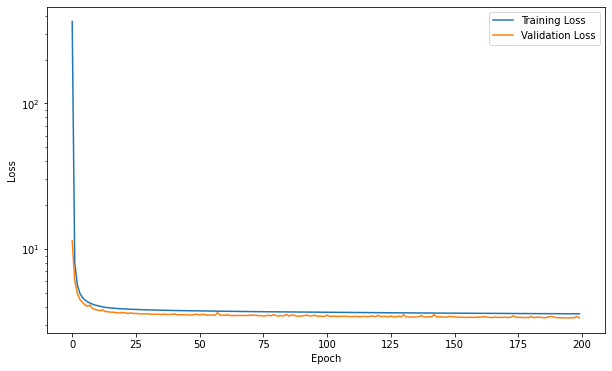

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [7]:
output = model.predict(ipd.clusters_v)

In [19]:
def gaus(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi * sigma**2))* np.exp(-(x-mu)**2 / (2*sigma**2))

def histo_output(arr_NN, arr_fit, arr_truth, name='', figsave=False, range_x = (-1,1), bins=300, fit=True):
    '''takes output of neural network (either x,y OR E), the fit values (either x,y, OR E) and the true values of e,y or E. 
    Define with name which parameter (x,y,E) you gave as input. Axis are in GeV or cm'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist(arr_NN-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference NN - truth")
    # fit
    if fit==True:
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr1 = np.sqrt(np.diag(pcov1))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt1)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.5f} \pm {:.5f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
        plt.legend()
    
    plt.subplot(2,1,2)
    n_counts, bins, patches = plt.hist(arr_fit-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference fit - truth")
    
    if fit==True:
        # fit
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt2, pcov2 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr2 = np.sqrt(np.diag(pcov2))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt2)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.5f} \pm {:.5f})$".format(popt2[0], perr2[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt2[1], perr2[1]))
        plt.legend()
    
    plt.tight_layout()
    if figsave == True:
        plt.savefig(name+"_histo.pdf")
    plt.show()
    
    if fit==True:
        return popt1, perr1, popt2, perr2 


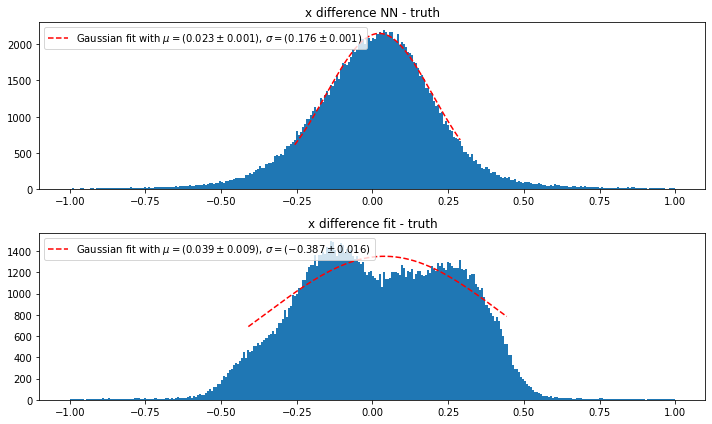

(array([2.25106215e-02, 1.76271182e-01, 9.49866989e+02]),
 array([1.08187039e-03, 1.46162954e-03, 6.30972675e+00]),
 array([ 3.94326838e-02, -3.87367311e-01,  1.31137766e+03]),
 array([8.86596532e-03, 1.64635538e-02, 4.46516356e+01]))

In [9]:
mf.histo_output(output.T[0], ipd.veri_fit.T[0], ipd.veri_truth.T[0], name="x", fit=True)

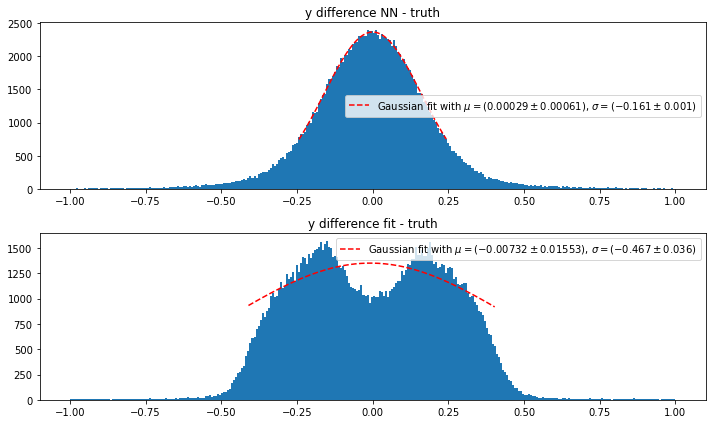

(array([ 2.91642655e-04, -1.60695539e-01,  9.51276684e+02]),
 array([6.08025106e-04, 8.35866326e-04, 3.95240000e+00]),
 array([-7.32199100e-03, -4.67359857e-01,  1.58267271e+03]),
 array([1.55334383e-02, 3.64985698e-02, 1.03131996e+02]))

In [20]:
histo_output(output.T[1], ipd.veri_fit.T[1], ipd.veri_truth.T[1], name="y")

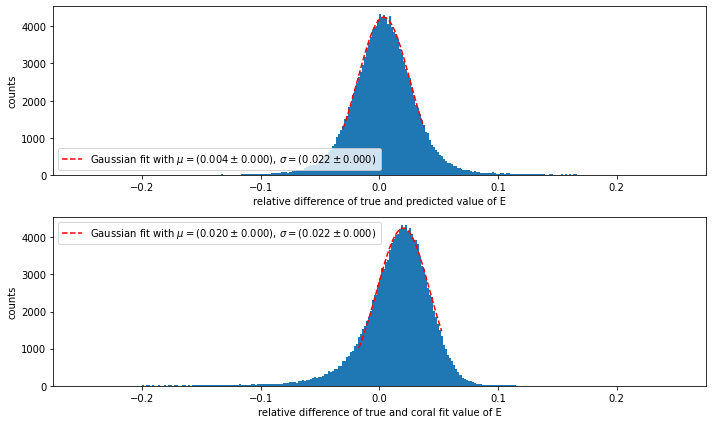

In [11]:
E_bad = mf.histo_output_relE(output.T[2], ipd.veri_fit.T[2], ipd.veri_truth.T[2], name="E", range_x=(-0.25,0.25), fit=True)

In [12]:
keras.models.save_model(model, 'stage3model_truely_correct')

INFO:tensorflow:Assets written to: stage3model_truely_correct/assets


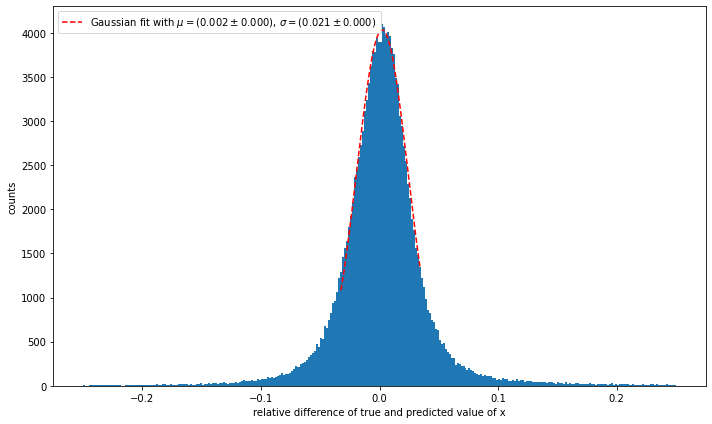

(array([6.70085147, 5.75831398, 4.52241267, ..., 0.61875133, 7.84718969,
        7.05911687]),
 array([ 17.83600168,  84.79477718, 189.90360575, ...,  25.75719676,
        113.91413803, 173.29054246]))

In [13]:
mf.histo_output_relxy(output.T[0], ipd.veri_truth.T[0], ipd.veri_truth.T[2], name='x')

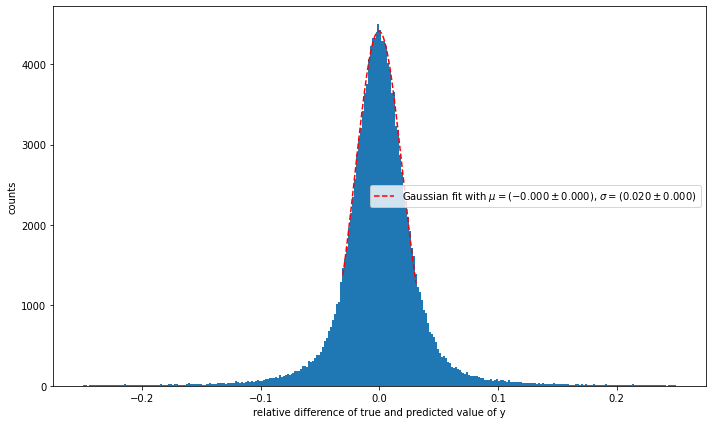

(array([11.41588421,  6.19218569,  5.83241445, ...,  6.89705192,
         4.36438657,  7.60109914]),
 array([ 17.83600168, 189.90360575,  47.80547176, ...,  79.97233901,
         41.37532296, 144.99599184]))

In [14]:
mf.histo_output_relxy(output.T[1], ipd.veri_truth.T[1], ipd.veri_truth.T[2], name='y')

<h2> Summary </h2>

Yeay this looks good!

| (x/y/rel E) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simple model stage 3 | 0.023 / 0.00029 / 0.004 | 0.176 / 0.161 / 0.022 |

